# Data exploration

Start by some quick **data exploration**. Perform the following tasks
- Plot a few images from each category
- Make a scree plot, how many components explain 10%, 20%, …, 90% and 100% of the variance?
- Visualize the features on a 2d-plot with PCA using the first two components. What can you say about the results?

Loading data from npz file

In [11]:
import importlib; import cours_proj4_funcs; 
importlib.reload(cours_proj4_funcs)
from cours_proj4_funcs import f_read_npzF, f_addIdxFeat, f_fileApp

In [12]:
import numpy as np
import os

X_tr_ini, y_tr_ini, X_data_tr, fnames_tr, y_cat_tr = f_read_npzF(os.path.join('data', 'data_train.npz'))

X_tr_ini1 = f_addIdxFeat(X_tr_ini)

print('X_tr_ini:', X_tr_ini.shape, X_tr_ini.dtype)
print('y_tr_ini:', y_tr_ini.shape, y_tr_ini.dtype)
print('X_data_tr:', X_data_tr.shape, X_data_tr.dtype)
print('fnames_tr:', fnames_tr.shape, fnames_tr.dtype)
print('X_tr_ini1:', X_tr_ini1.shape, X_tr_ini1.dtype)

X_tr_ini: (280, 1280) float32
y_tr_ini: (280,) int32
X_data_tr: (280, 224, 224, 3) float32
fnames_tr: (280,) <U30
X_tr_ini1: (280, 1281) float32


In [13]:
X_va_ini, y_va_ini, X_data_va, fnames_va, y_cat_va = f_read_npzF(os.path.join('data', 'data_valid.npz'))

X_va_ini1 = f_addIdxFeat(X_va_ini)

print('X_va_ini:', X_va_ini.shape, X_va_ini.dtype)
print('y_va_ini:', y_va_ini.shape, y_va_ini.dtype)
print('X_data_va:', X_data_va.shape, X_data_va.dtype)
print('fnames_va:', fnames_va.shape, fnames_va.dtype)
print('X_va_ini1:', X_va_ini1.shape, X_va_ini1.dtype)

X_va_ini: (139, 1280) float32
y_va_ini: (139,) int32
X_data_va: (139, 224, 224, 3) float32
fnames_va: (139,) <U30
X_va_ini1: (139, 1281) float32


In [14]:
X_te_ini, y_te_ini, X_data_te, fnames_te, y_cat_te = f_read_npzF(os.path.join('data', 'data_test.npz'))

X_te_ini1 = f_addIdxFeat(X_te_ini)

print('X_te_ini:', X_te_ini.shape, X_te_ini.dtype)
print('y_te_ini:', y_te_ini.shape, y_te_ini.dtype)
print('X_data_te:', X_data_te.shape, X_data_te.dtype)
print('fnames_te:', fnames_te.shape, fnames_te.dtype)
print('X_te_ini1:', X_te_ini1.shape, X_te_ini1.dtype)

X_te_ini: (50, 1280) float32
y_te_ini: (50,) int32
X_data_te: (280, 224, 224, 3) float32
fnames_te: (50,) <U30
X_te_ini1: (50, 1281) float32


#### - Plot a few images from each category

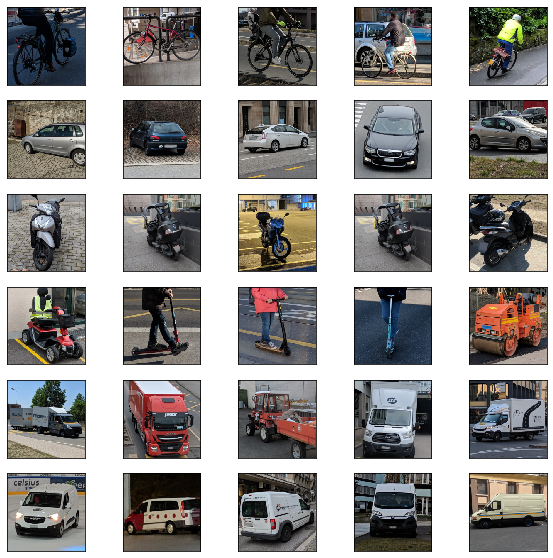

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
# Create a grid of subplots
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(10,10))

for i, axis in enumerate(axes.flatten()):
    
    image = X_data_tr[y_tr_ini==int(i/5)][random.randint(0,24)] #20)]
    image = image - image.min()
    image = image / image.max()
    
    axis.imshow(image)
    
    #axis.set_title('Test image', size=9, pad=2)
    axis.get_xaxis().set_visible(False) # disable x-axis
    axis.get_yaxis().set_visible(False) # disable y-axis
    
plt.show()

#### - Make a scree plot, how many components explain 10%, 20%, …, 90% and 100% of the variance?

In [16]:
from sklearn.preprocessing import StandardScaler

# Create Standard scaler
X_tr_rescaled = StandardScaler().fit_transform(X_tr_ini)

In [17]:
from sklearn.decomposition import PCA

# Create PCA transformer
pca_n = PCA(n_components=None)

# Apply PCA to rescaled data
pca_n.fit(X_tr_rescaled)

# Proportion of variance explained
pve = pca_n.explained_variance_ratio_

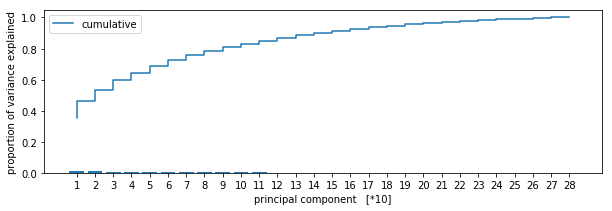

In [18]:
# Create bar plot
fig = plt.figure(figsize=(10,3)) #figure()

#xcor = np.arange(1, pve.shape[0] + 1) # 1,2,..,n_components
xcor = np.arange(1, int(len(pve)/10) + 1) # given the lenght of the PCAs

#plt.bar(xcor, pve)
plt.bar(xcor, pve[xcor*10-1])
plt.xticks(xcor)

# Add cumulative sum
pve_cumsum = np.cumsum(pve)

plt.step(xcor #+ 0.5   # 1.5,2.5,..,n_components+0.5
        ,pve_cumsum[xcor*10-1] # Cumulative sum 
        #,pve_cumsum 
        ,label='cumulative')

# Add labels
plt.xlabel('principal component   [*10]')
plt.ylabel('proportion of variance explained')
plt.legend()
plt.show()

Accordint to above plot, at 80% of the variance, we have between 90 and 100 Principal components.

* Visualize the features on a 2d-plot with PCA using the first two components. What can you say about the results?

In [19]:
from sklearn.decomposition import PCA

# Compute first two principal components
pca = PCA(n_components=2)

pca.fit(X = X_tr_ini, y = None);

img_components = pca.transform(X_tr_ini)
img_categ = y_tr_ini

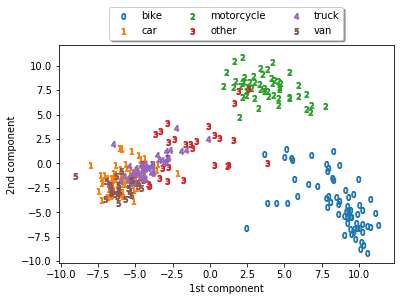

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

# Group images by categories
for categ_name in y_cat_tr:
    categ, catName = int(categ_name.split(':')[0]), categ_name.split(':')[1]
    
    # Images of this category
    idx = (img_categ == categ)
    
    # Plot images
    plt.scatter( img_components[idx, 0], img_components[idx, 1]
                 # Use category number as markers
                ,marker="${}$".format(categ)
                ,label='{}'.format(catName)
                #,s=45  # Size of each marker 
                ) 
    
# Add legend and labels
plt.legend(loc='upper center', bbox_to_anchor=(0.5,1.2), shadow=True, ncol=3) #(0.5,-0.05)

plt.xlabel('1st component')
plt.ylabel('2nd component')
plt.show()

We can think of this plot as a 2-dimensional view of the category of the swissroads images data reducing the number of dimensions by projecting the data onto a set of 2 orthogonal axes that are Principal components.